In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [279]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [280]:

stock_data=pd.read_csv('datasets/merged_stock_data.csv')

#Mag 7 list
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'META', 'TSLA', 'NVDA']
#company_list = [AAPL, GOOG, MSFT, AMZN, META, TSLA, NVDA]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "META", "TESLA", "NVIDIA"]


stock_data.head(30)

Date  Adj Close  Close   High    Low   Open  \
0   2012-03-14 00:00:00+00:00      17.78  21.06  21.24  20.55  20.64   
1   2012-03-16 00:00:00+00:00      17.66  20.91  21.04  20.64  20.88   
2   2012-03-19 00:00:00+00:00      18.13  21.47  21.49  21.04  21.37   
3   2012-03-20 00:00:00+00:00      18.28  21.64  21.67  21.12  21.41   
4   2012-03-21 00:00:00+00:00      18.17  21.52  21.77  21.48  21.53   
5   2012-03-22 00:00:00+00:00      18.08  21.41  21.59  21.27  21.35   
6   2012-03-23 00:00:00+00:00      17.98  21.29  21.49  21.23  21.45   
7   2012-03-26 00:00:00+00:00      18.31  21.68  21.68  21.26  21.42   
8   2012-03-27 00:00:00+00:00      18.53  21.95  22.01  21.65  21.65   
9   2012-03-28 00:00:00+00:00      18.63  22.06  22.19  21.80  22.08   
10  2012-03-29 00:00:00+00:00      18.39  21.78  22.02  21.69  21.89   
11  2012-03-30 00:00:00+00:00      18.08  21.41  21.81  21.35  21.74   
12  2012-04-02 00:00:00+00:00      18.66  22.09  22.10  21.44  21.49   
13  2012-04-03 00:00:00+00:00      18.98  22.48  22.58  22.23  22.40   
14  2012-04-04 00:00:00+00:00      18.83  22.30  22.35  22.04  22.30   
15  2012-04-05 00:00:00+00:00      19.11  22.63  22.67  22.26  22.39   
16  2012-04-09 00:00:00+00:00      19.19  22.72  22.85  22.33  22.36   
17  2012-04-10 00:00:00+00:00      18.95  22.44  23.00  22.36  22.85   
18  2012-04-11 00:00:00+00:00      18.89  22.36  22.75  22.26  22.72   
19  2012-04-12 00:00:00+00:00      18.78  22.24  22.55  22.16  22.32   
20  2012-04-13 00:00:00+00:00      18.25  21.62  22.31  21.55  22.29   
21  2012-04-16 00:00:00+00:00      17.50  20.72  21.80  20.65  21.79   
22  2012-04-17 00:00:00+00:00      18.39  21.77  21.79  20.43  20.68   
23  2012-04-18 00:00:00+00:00      18.35  21.73  22.15  21.53  21.92   
24  2012-04-19 00:00:00+00:00      17.72  20.98  21.60  20.88  21.44   
25  2012-04-20 00:00:00+00:00      17.28  20.46  21.24  20.37  21.12   
26  2012-04-23 00:00:00+00:00      17.24  20.42  20.60  19.88  20.38   
27  2012-04-24 00:00:00+00:00      16.90  20.01  20.27  19.82  20.09   
28  2012-04-25 00:00:00+00:00      18.40  21.79  22.07  21.64  21.99   
29  2012-04-26 00:00:00+00:00      18.33  21.70  21.95  21.50  21.94   

        Volume company_name  20EMA  50SMA    RSI    VIX  
0   1418844000         AAPL  19.04  17.15  85.52  15.31  
1    825487600         AAPL  19.38  17.39  80.61  14.47  
2    901236000         AAPL  19.58  17.52  81.71  15.04  
3    816662000         AAPL  19.77  17.65  81.32  15.58  
4    644042000         AAPL  19.94  17.78  78.22  15.13  
5    623870800         AAPL  20.08  17.91  75.72  15.57  
6    430488800         AAPL  20.19  18.03  82.57  14.82  
7    595742000         AAPL  20.33  18.17  86.68  14.26  
8    607129600         AAPL  20.49  18.31  87.52  15.59  
9    655460400         AAPL  20.64  18.44  86.54  15.47  
10   608238400         AAPL  20.75  18.57  79.93  15.48  
11   731038000         AAPL  20.81  18.69  71.31  15.50  
12   598351600         AAPL  20.93  18.84  72.06  15.64  
13   834559600         AAPL  21.08  18.98  69.15  15.66  
14   572980800         AAPL  21.20  19.13  68.50  16.44  
15   641298000         AAPL  21.33  19.26  71.08  16.70  
16   597536800         AAPL  21.46  19.40  67.37  18.81  
17   889725200         AAPL  21.56  19.53  60.80  20.39  
18   696614800         AAPL  21.63  19.65  61.53  20.02  
19   614336800         AAPL  21.69  19.77  61.36  17.20  
20   859644800         AAPL  21.69  19.88  53.91  19.55  
21  1050786800         AAPL  21.59  19.96  39.79  19.55  
22  1025528000         AAPL  21.61  20.07  48.44  18.46  
23   954531200         AAPL  21.62  20.17  46.94  18.64  
24   834719200         AAPL  21.56  20.26  43.20  18.36  
25  1030985200         AAPL  21.46  20.33  42.14  17.44  
26   966529200         AAPL  21.36  20.38  34.49  18.97  
27  1076149200         AAPL  21.23  20.43  27.29  18.10  
28   905777600         AAPL  21.28  20.51  46.36  16.82  
29   536068400         AAPL  21.32  20.58  43.15  16

In [281]:
stock_data.isnull().sum()

Date            0
Adj Close       0
Close           0
High            0
Low             0
Open            0
Volume          0
company_name    0
20EMA           0
50SMA           0
RSI             0
VIX             0
dtype: int64

In [282]:
stock_data.duplicated().sum().any()

False

In [283]:
stock_data.describe()

Adj Close         Close          High           Low          Open  \
count  22129.000000  22129.000000  22129.000000  22129.000000  22129.000000   
mean      92.871385     94.075658     95.246856     92.834002     94.052547   
std       98.937918     99.205901    100.471117     97.883958     99.201921   
min        0.260000      0.280000      0.290000      0.280000      0.290000   
25%       19.420000     20.140000     20.400000     19.840000     20.130000   
50%       50.270000     52.220000     52.880000     51.680000     52.330000   
75%      144.830000    146.220000    147.850000    144.370000    146.010000   
max      595.940000    595.940000    602.950000    589.960000    598.220000   

             Volume         20EMA         50SMA           RSI           VIX  
count  2.212900e+04  22129.000000  22129.000000  22129.000000  22129.000000  
mean   1.304861e+08     93.288997     92.063089     54.863732     17.595618  
std    1.806287e+08     98.212844     96.883378     16.745353      6.737724  
min    1.584340e+05      0.300000      0.300000      3.140000      9.140000  
25%    2.902040e+07     20.070000     19.900000     42.760000     13.250000  
50%    6.107670e+07     51.770000     50.970000     55.040000     15.760000  
75%    1.360080e+08    145.530000    144.120000     67.250000     20.030000  
max    3.692928e+09    575.000000    550.370000     99.430000     82.690000

In [284]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22129 entries, 0 to 22128
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          22129 non-null  datetime64[ns, UTC]
 1   Adj Close     22129 non-null  float64            
 2   Close         22129 non-null  float64            
 3   High          22129 non-null  float64            
 4   Low           22129 non-null  float64            
 5   Open          22129 non-null  float64            
 6   Volume        22129 non-null  int64              
 7   company_name  22129 non-null  object             
 8   20EMA         22129 non-null  float64            
 9   50SMA         22129 non-null  float64            
 10  RSI           22129 non-null  float64            
 11  VIX           22129 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(9), int64(1), object(1)
memory usage: 2.0+ MB


stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.info()

In [286]:
stock_data.head()

Date  Adj Close  Close   High    Low   Open  \
0 2012-03-14 00:00:00+00:00      17.78  21.06  21.24  20.55  20.64   
1 2012-03-16 00:00:00+00:00      17.66  20.91  21.04  20.64  20.88   
2 2012-03-19 00:00:00+00:00      18.13  21.47  21.49  21.04  21.37   
3 2012-03-20 00:00:00+00:00      18.28  21.64  21.67  21.12  21.41   
4 2012-03-21 00:00:00+00:00      18.17  21.52  21.77  21.48  21.53   

       Volume company_name  20EMA  50SMA    RSI    VIX  
0  1418844000         AAPL  19.04  17.15  85.52  15.31  
1   825487600         AAPL  19.38  17.39  80.61  14.47  
2   901236000         AAPL  19.58  17.52  81.71  15.04  
3   816662000         AAPL  19.77  17.65  81.32  15.58  
4   644042000         AAPL  19.94  17.78  78.22  15.13

In [287]:
company_counts = stock_data.groupby('company_name').size().reset_index(name='counts')

print(company_counts)

  company_name  counts
0         AAPL    3174
1         AMZN    3175
2         GOOG    3175
3         META    3080
4         MSFT    3175
5         NVDA    3175
6         TSLA    3175


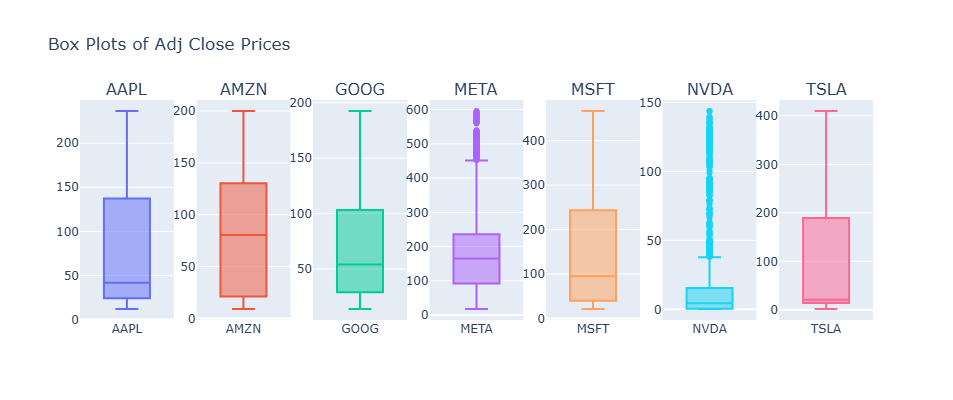

In [288]:
#plotting the distribution
def plot_adj_close_boxplot(data_fs):
    num_cols = data_fs['company_name'].unique()  # Get unique tickers
    
    fig = make_subplots(rows=1, cols=len(num_cols), 
                        subplot_titles=num_cols, 
                        vertical_spacing=0.2)

    for i, ticker in enumerate(num_cols):
        fig.add_trace(go.Box(y=data_fs[data_fs['company_name'] == ticker]['Adj Close'], 
                             name=ticker), row=1, col=i+1)

    fig.update_layout(height=400, width=1200, showlegend=False, 
                      title_text=f'Box Plots of Adj Close Prices')
    
    fig.show()


plot_adj_close_boxplot(stock_data)

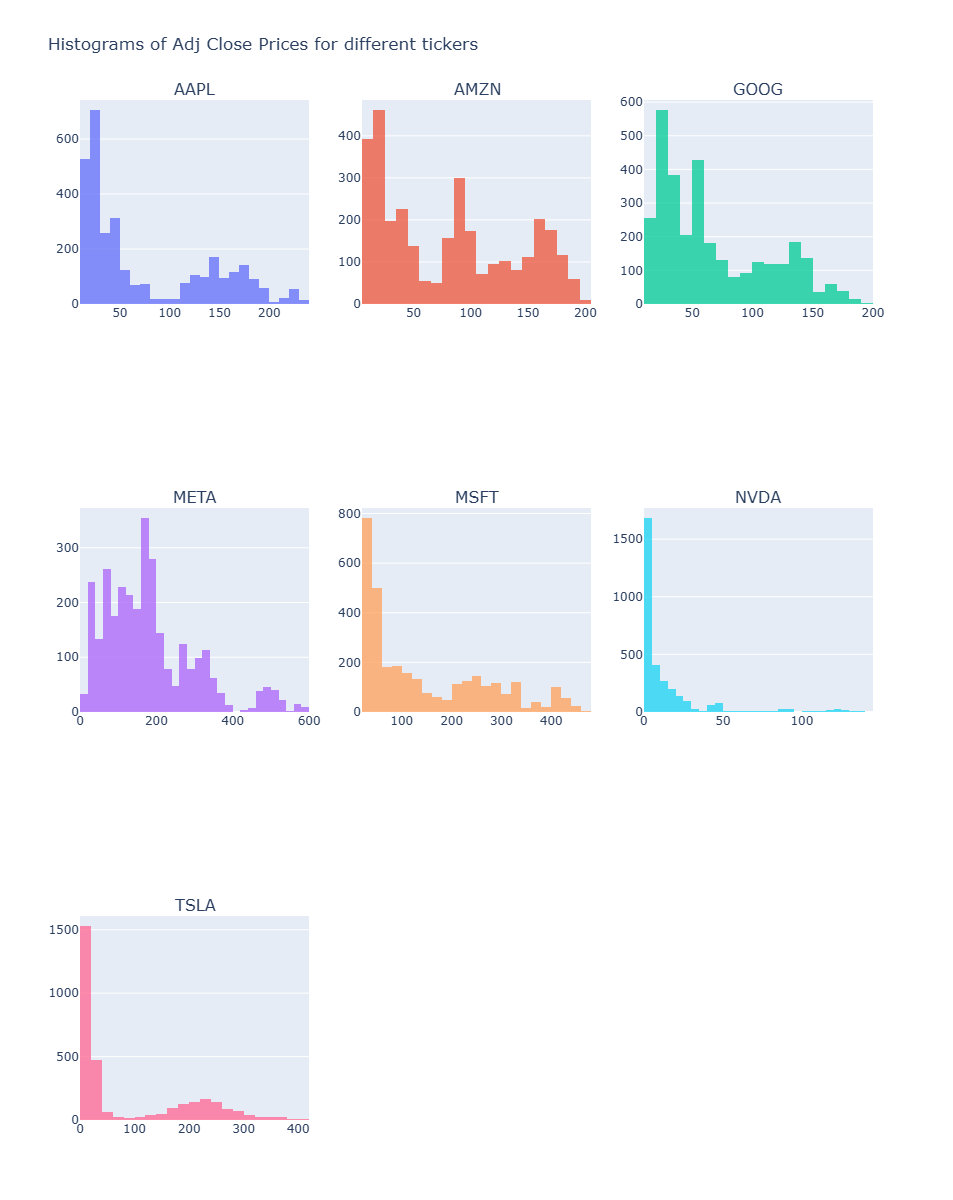

In [289]:
def plot_adj_close_histogram(data_fs, msg):
    num_cols = data_fs['company_name'].unique()  # Get unique tickers
    rows = (len(num_cols) + 2) // 3  # Calculate the number of rows needed (3 per row)
    
    fig = make_subplots(rows=rows, cols=3, 
                        subplot_titles=num_cols, 
                        vertical_spacing=0.2)

    for i, ticker in enumerate(num_cols):
        row = (i // 3) + 1  # Determine the row number
        col = (i % 3) + 1   # Determine the column number
        
        fig.add_trace(go.Histogram(x=data_fs[data_fs['company_name'] == ticker]['Adj Close'], 
                                     name=ticker, 
                                     opacity=0.75, 
                                     nbinsx=30), 
                       row=row, col=col)

    fig.update_layout(height=400 * rows, width=1200, showlegend=False, 
                      title_text=f'Histograms of Adj Close Prices {msg}')
    
    fig.show()

# Example usage
plot_adj_close_histogram(stock_data, 'for different tickers')

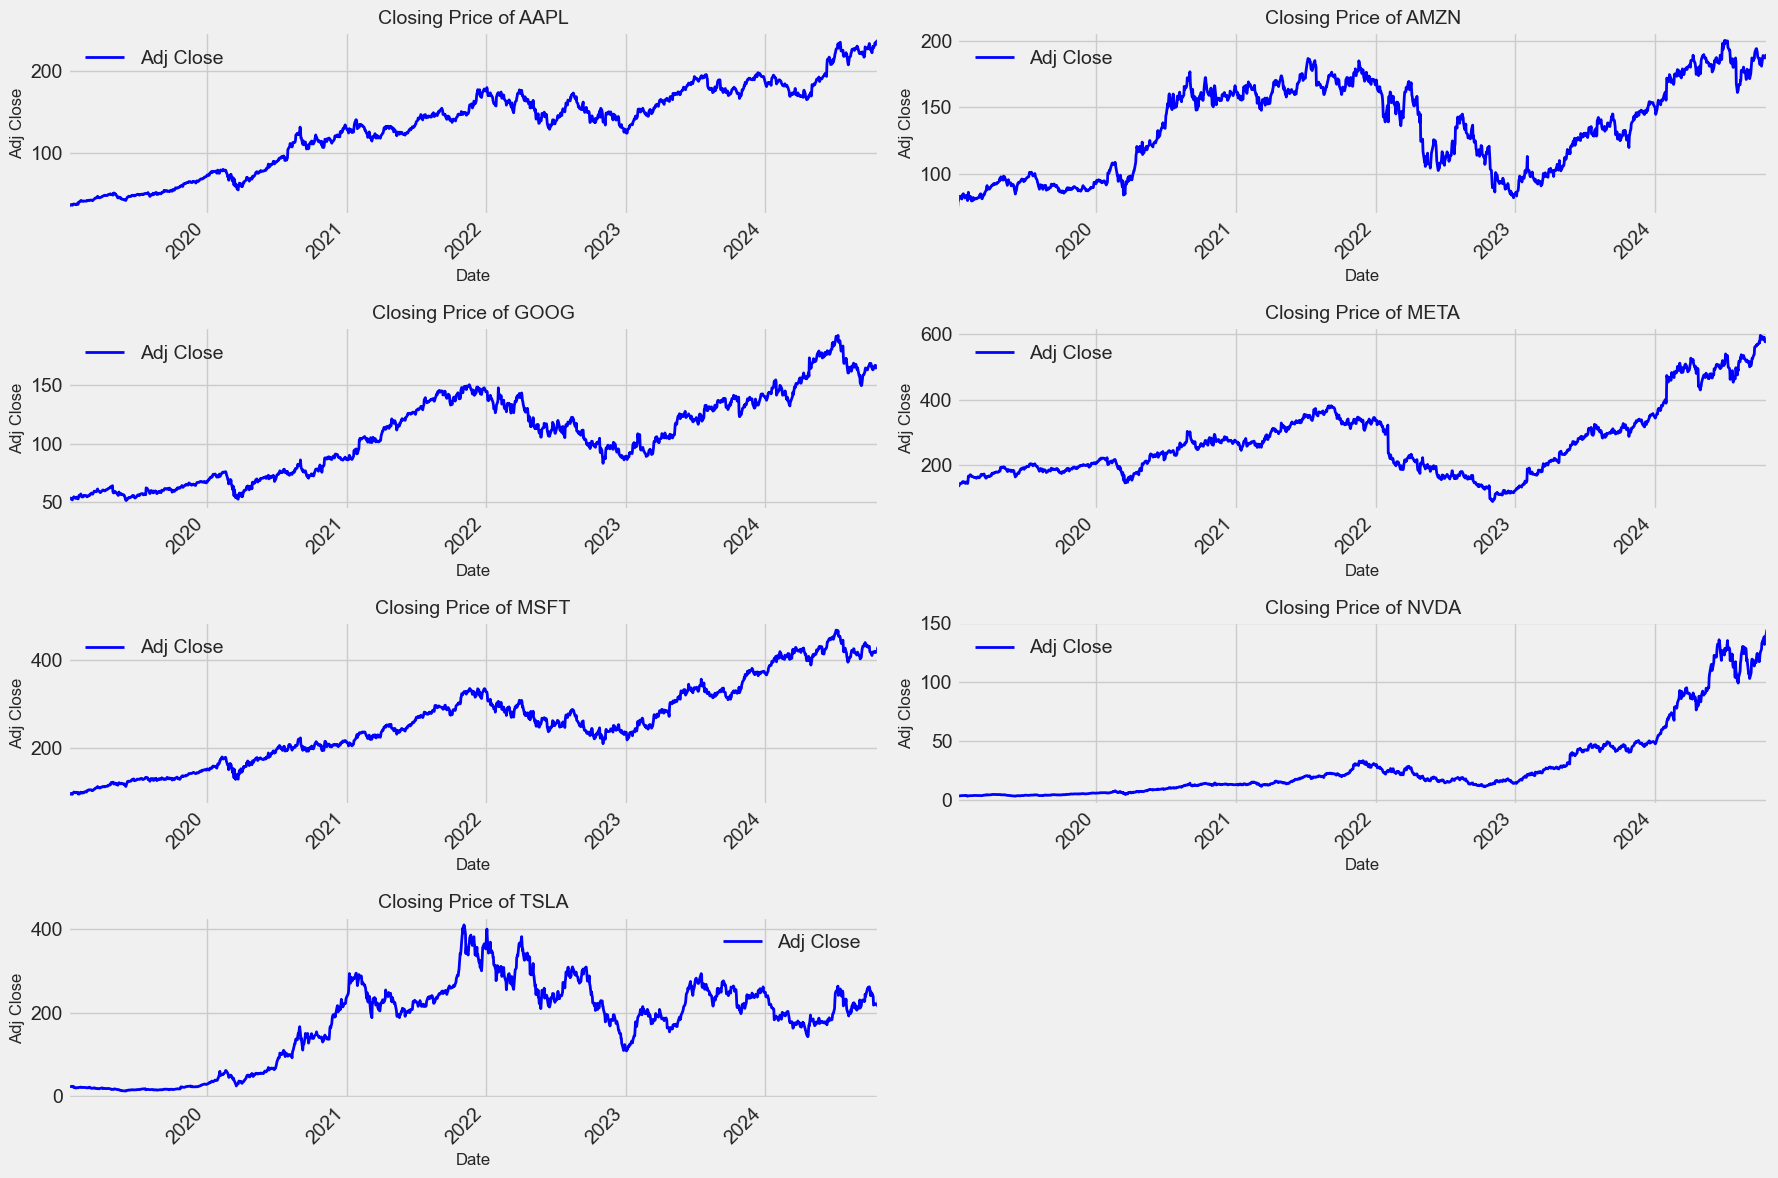

In [290]:

stock_data = stock_data[stock_data['Date'] >= '2019-01-01']

company_name = stock_data['company_name'].unique()

# Set the number of subplots based on the number of companies
num_companies = len(company_name)
cols = 2  # Number of columns in the subplot grid
rows = (num_companies + cols - 1) // cols  # Calculate rows needed

# Create the figure for the subplots
plt.figure(figsize=(18, 12))  # Increased figure size for better visibility
plt.subplots_adjust(top=0.92, bottom=0.1, left=0.1, right=0.9, hspace=0.4, wspace=0.4)  # Adjusted layout

for i, company in enumerate(company_name):
    # Filter data for the current company
    company_data = stock_data[stock_data['company_name'] == company]
    
    # Create a subplot for each company
    plt.subplot(rows, cols, i + 1)
    
    # Plotting the line graph for Adjusted Close prices
    plt.plot(company_data['Date'], company_data['Adj Close'], label='Adj Close', color='blue', linewidth=2)  # Line plot
    plt.ylabel('Adj Close', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.title(f"Closing Price of {company}", fontsize=14)

    # Format x-axis labels to show dates correctly
    plt.xticks(rotation=45, ha='right')  # Rotated and aligned x-axis labels for better readability
    plt.gca().xaxis_date()  # Automatically format x-axis as dates
    plt.gca().margins(x=0)  # Remove margins on x-axis for better fit
    plt.grid(True)  # Added grid for better readability
    plt.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

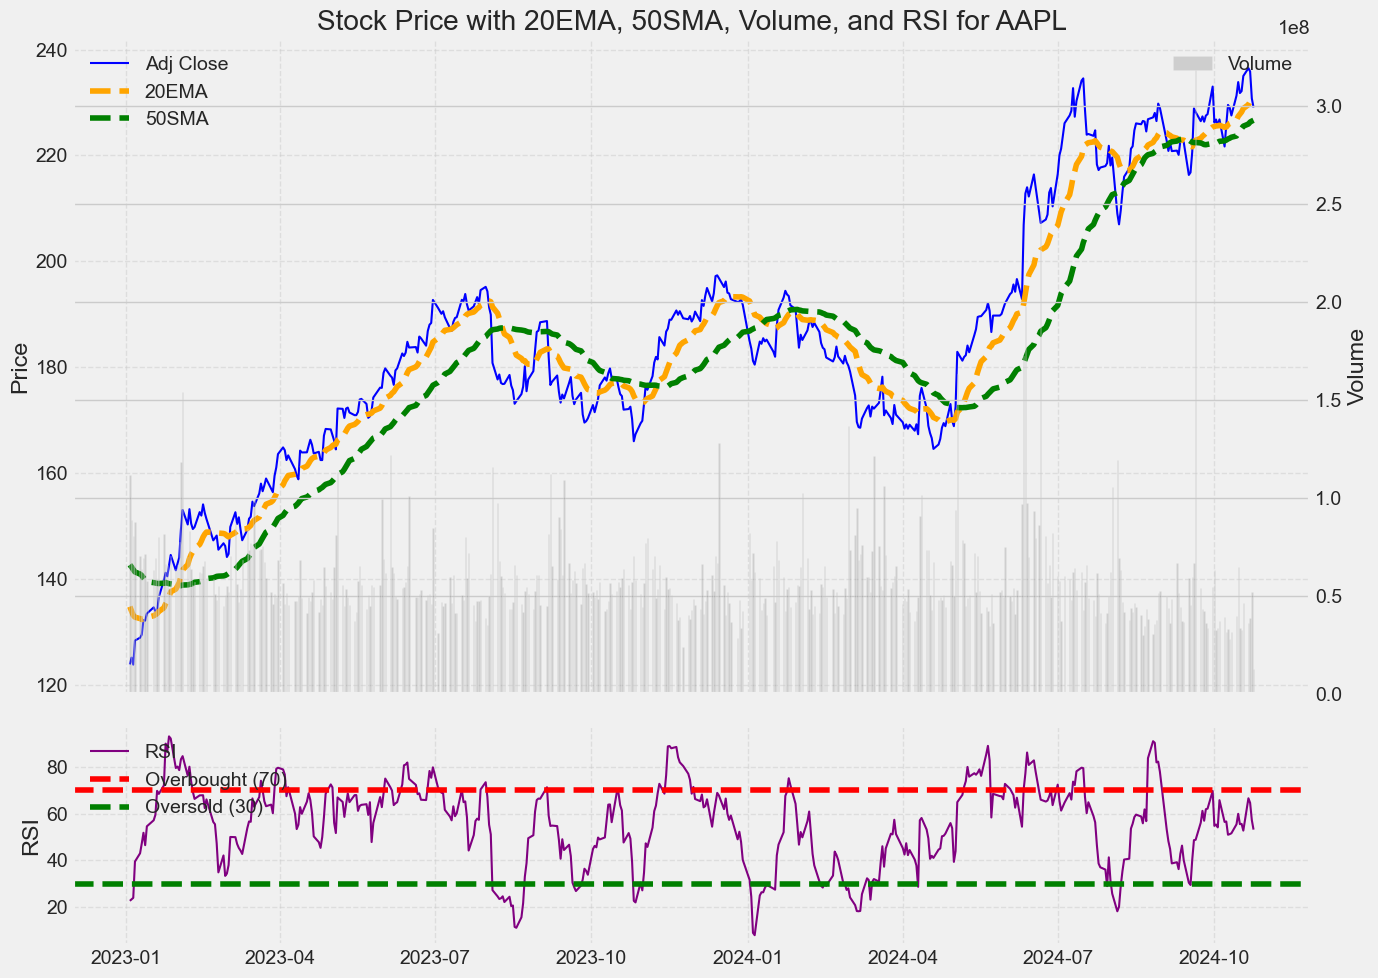

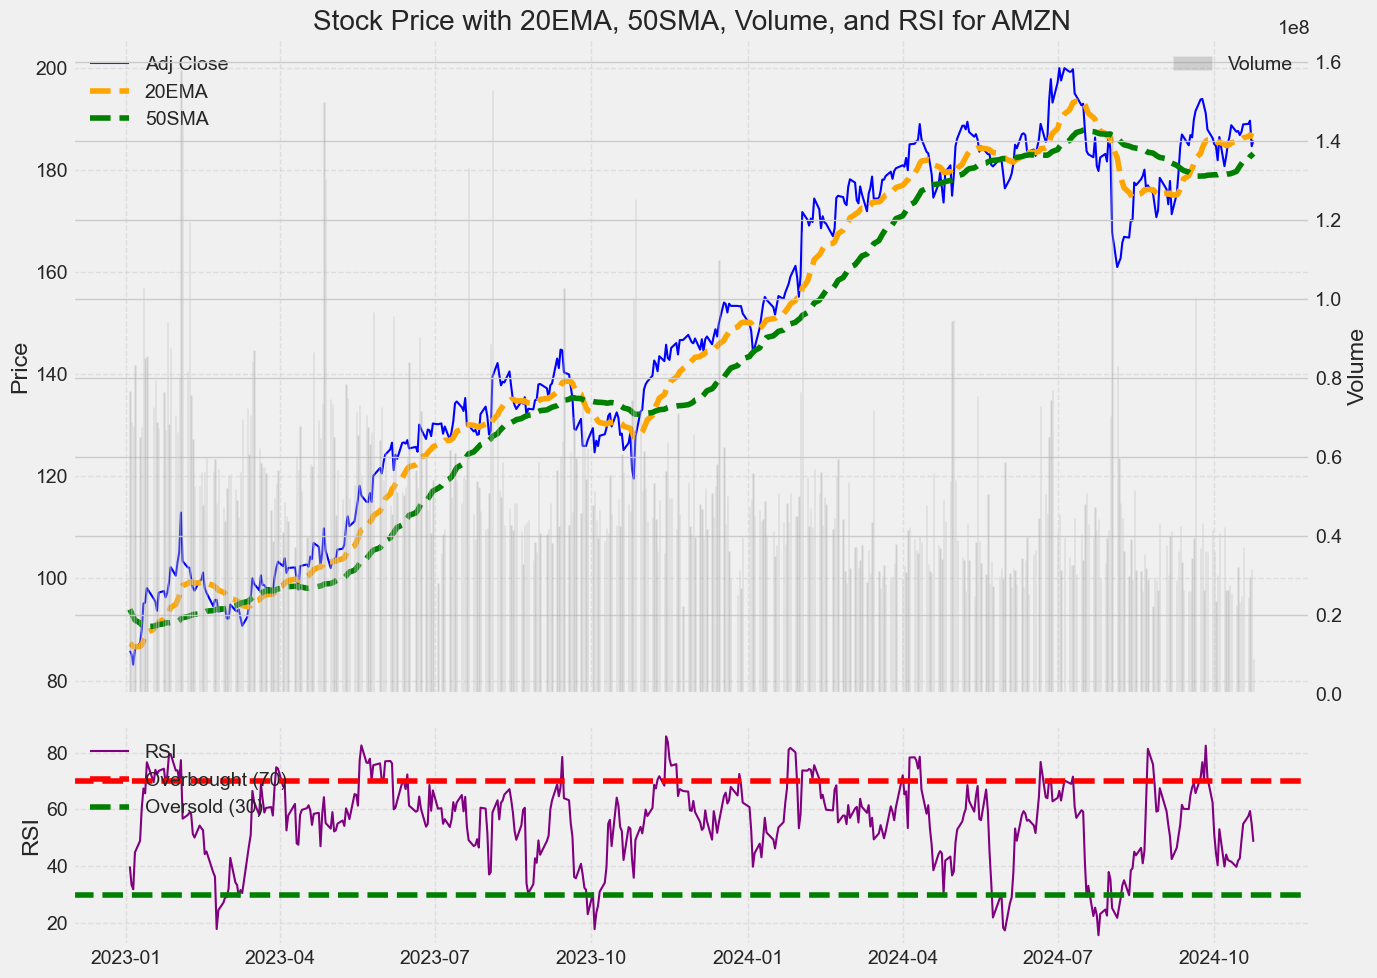

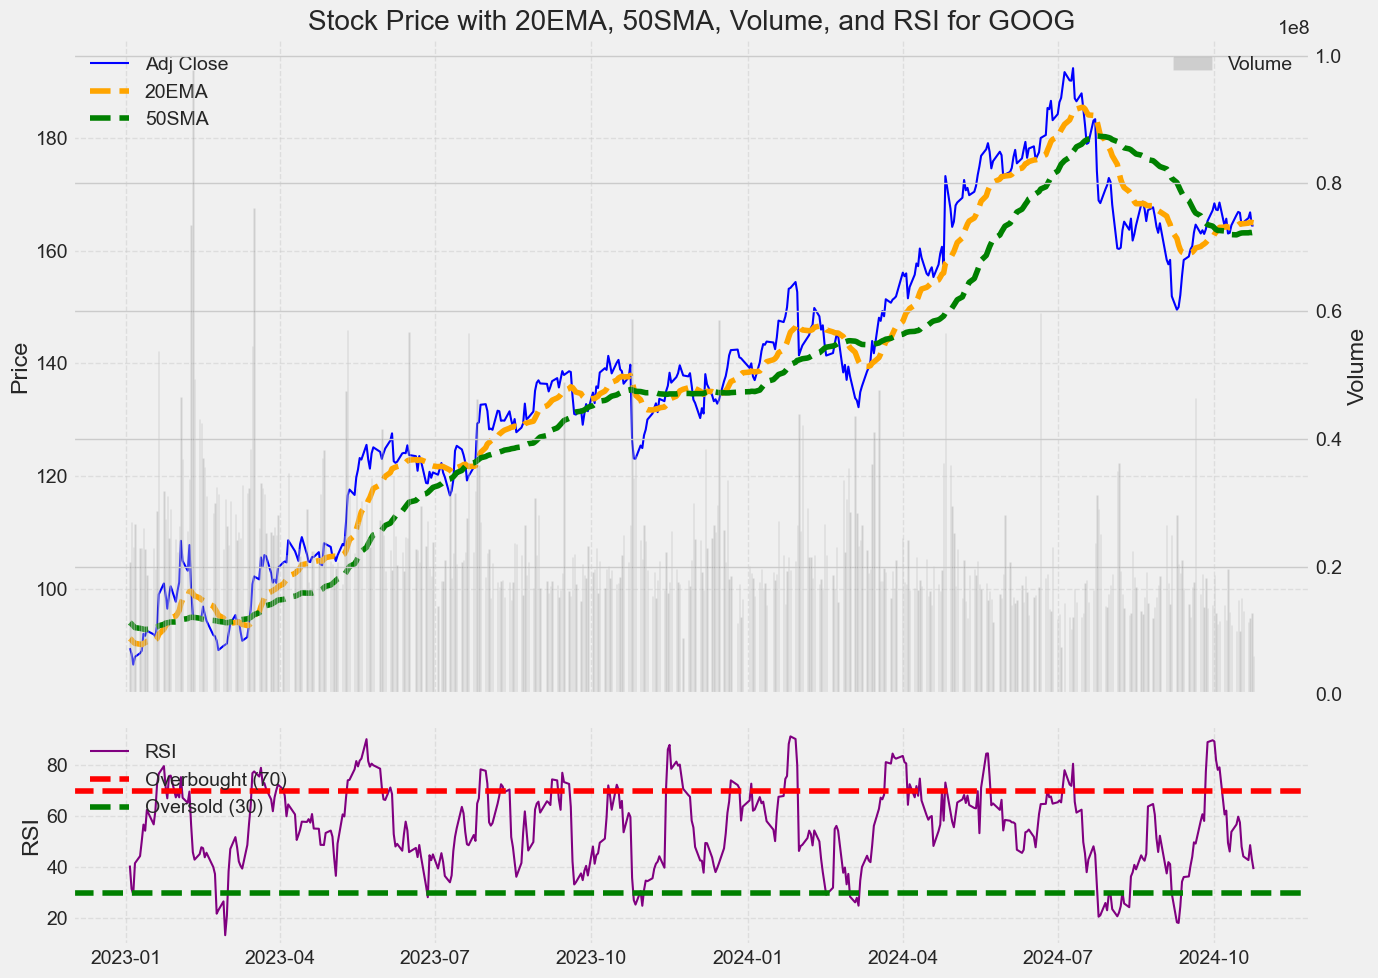

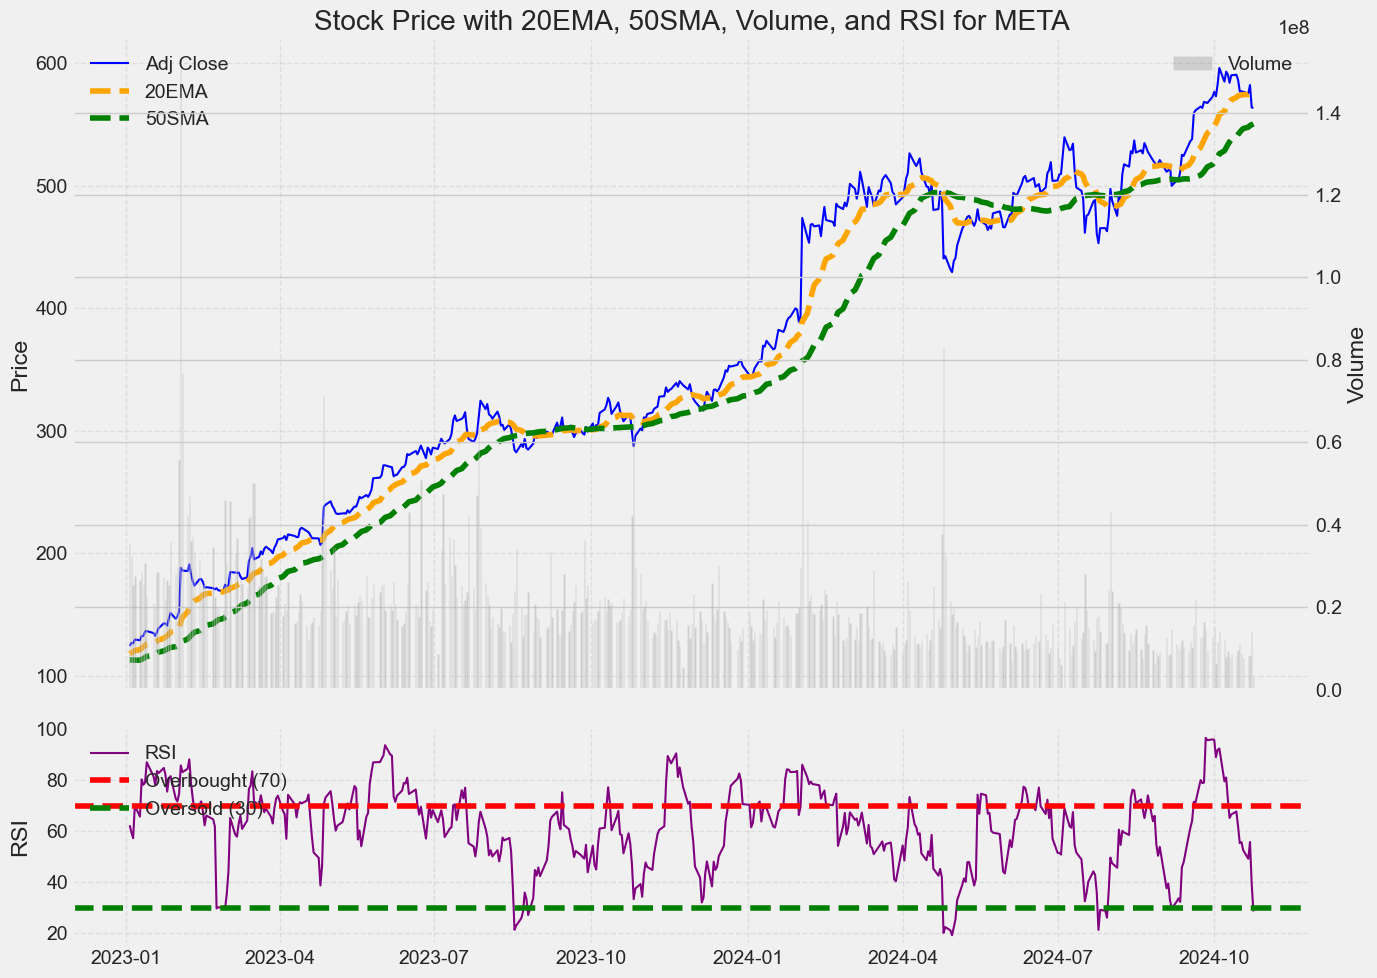

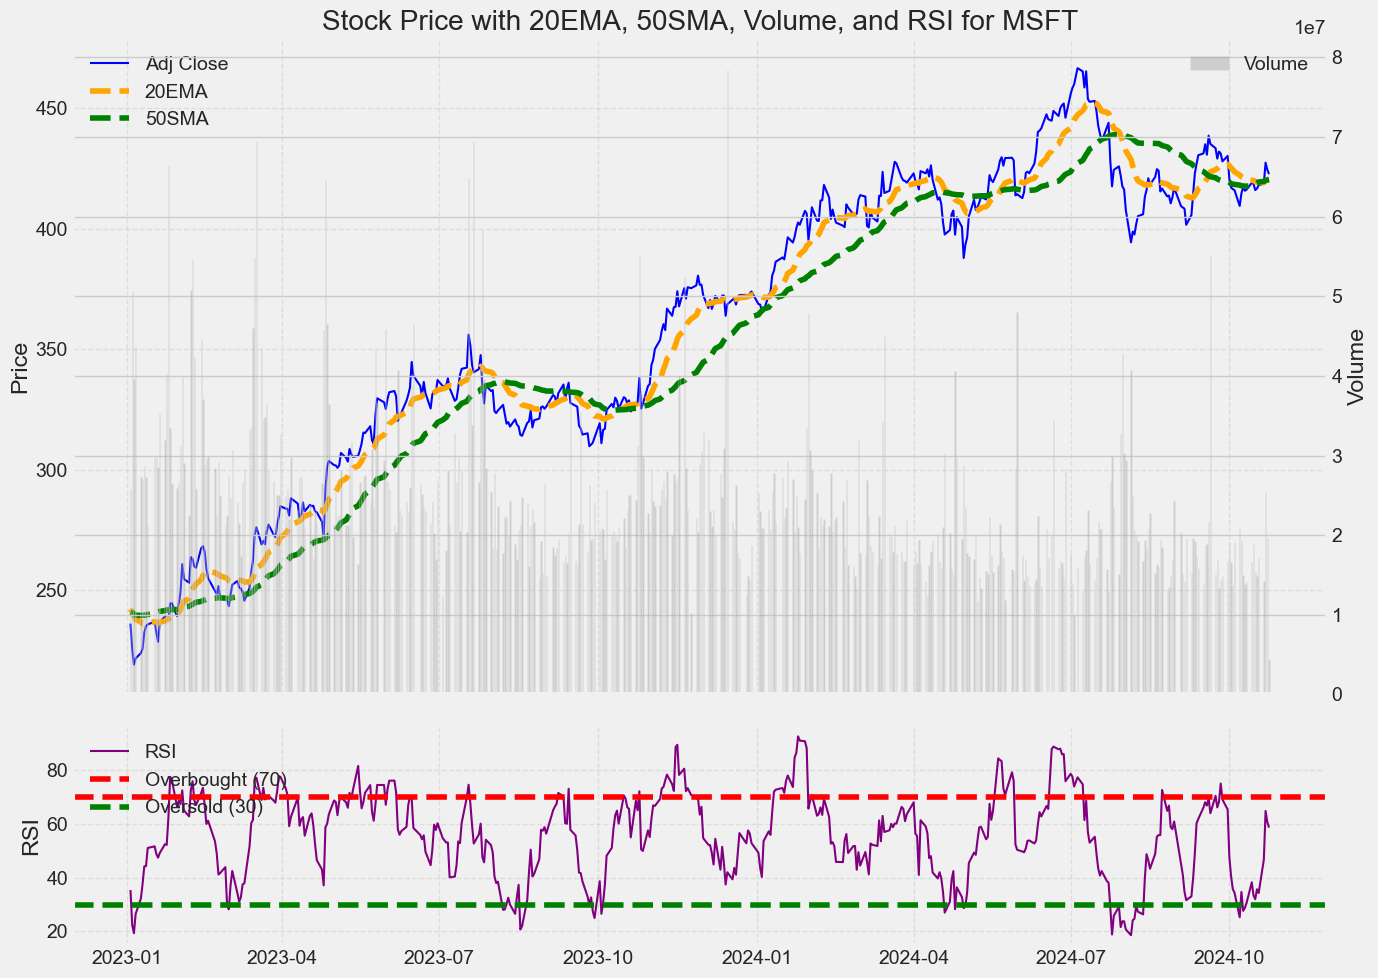

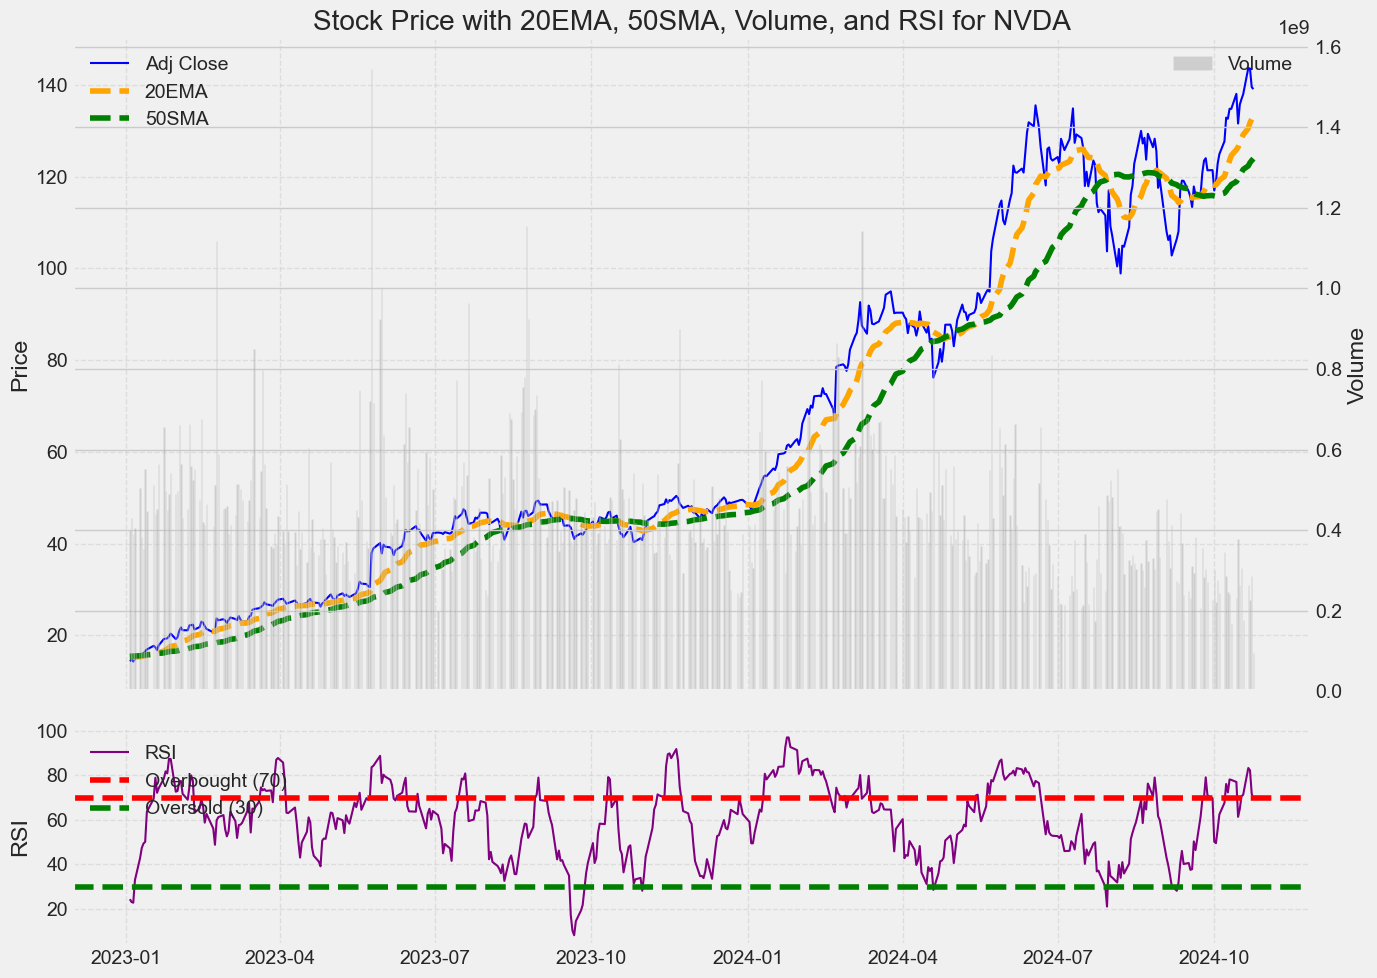

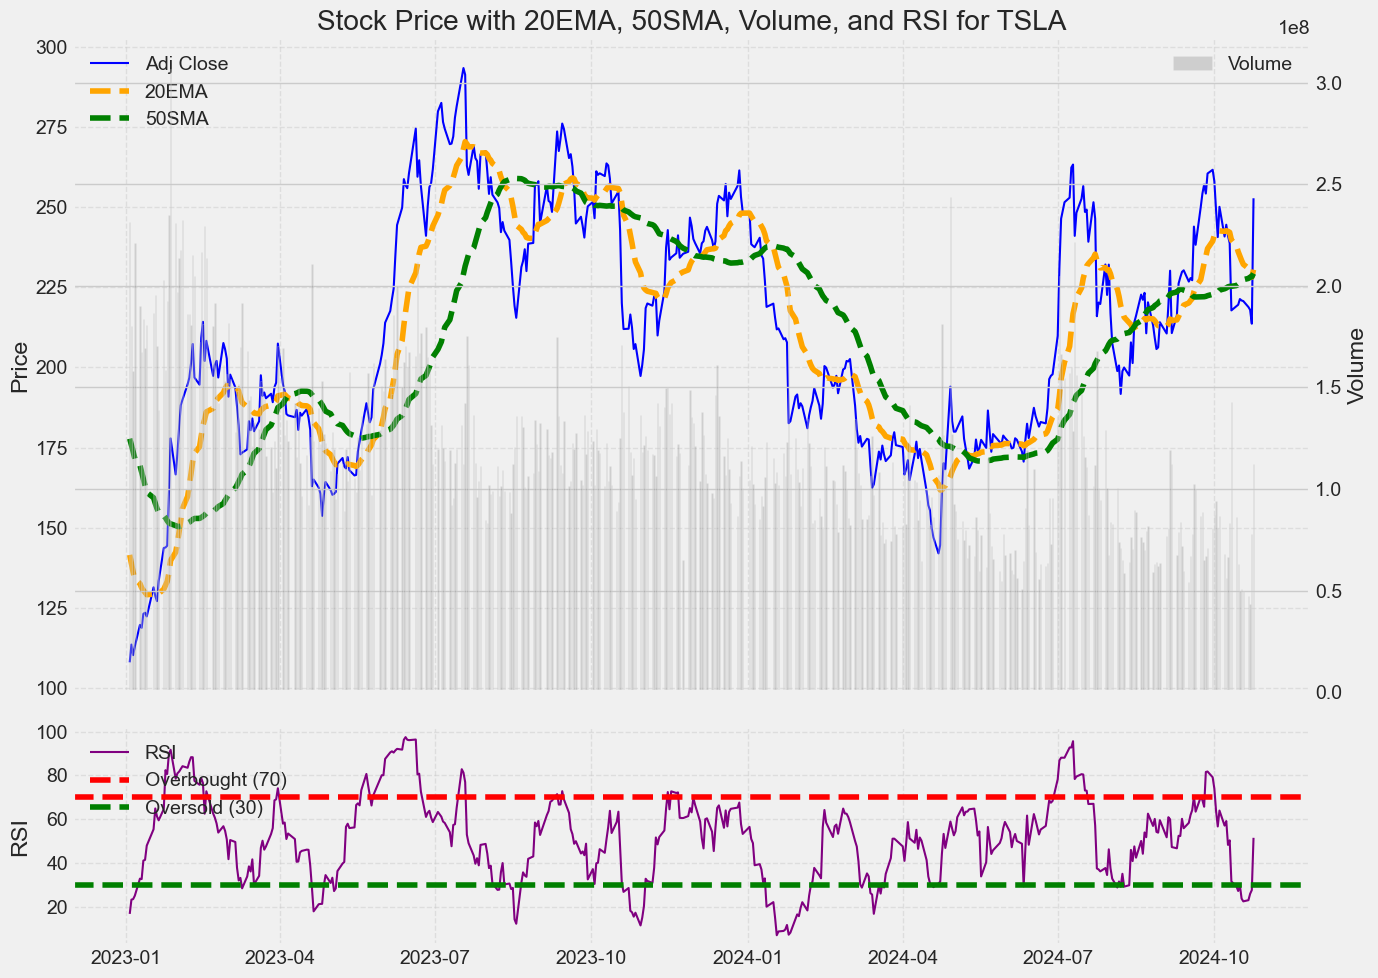

In [291]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# List of unique company tickers
tickers = stock_data['company_name'].unique()

# Loop through each ticker and create a separate plot with RSI as a subplot
for ticker in tickers:
    # Filter data for the current ticker and date range
    ticker_data = stock_data[(stock_data['company_name'] == ticker) & 
                             (stock_data['Date'] >= '2023-01-01') & 
                             (stock_data['Date'] <= '2024-12-31')]

    # Set up figure with two subplots: Price and RSI
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
    
    # Plot Adj Close, 20EMA, and 50SMA as line charts on the main axis (ax1)
    ax1.plot(ticker_data['Date'], ticker_data['Adj Close'], label='Adj Close', color='blue', linewidth=1.5)
    ax1.plot(ticker_data['Date'], ticker_data['20EMA'], label='20EMA', color='orange', linestyle='--')
    ax1.plot(ticker_data['Date'], ticker_data['50SMA'], label='50SMA', color='green', linestyle='--')

    # Create a secondary y-axis for Volume on ax1
    ax3 = ax1.twinx()  # Create a twin axis for volume
    ax3.bar(ticker_data['Date'], ticker_data['Volume'], color='grey', alpha=0.3, label='Volume', width=0.8)

    # Set labels and title for the main subplot (price and volume)
    ax1.set_ylabel('Price')
    ax3.set_ylabel('Volume')
    ax1.set_title(f'Stock Price with 20EMA, 50SMA, Volume, and RSI for {ticker}')

    # Set x-axis format and rotation for readability
    ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
    ax1.grid(visible=True, linestyle='--', alpha=0.5)
    plt.xticks(rotation=45)

    # Show legends
    ax1.legend(loc='upper left')
    ax3.legend(loc='upper right')

    # Plot the RSI on the second axis (ax2)
    ax2.plot(ticker_data['Date'], ticker_data['RSI'], label='RSI', color='purple', linewidth=1.5)
    ax2.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    ax2.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    ax2.set_ylabel('RSI')
    ax2.legend(loc='upper left')
    ax2.grid(visible=True, linestyle='--', alpha=0.5)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

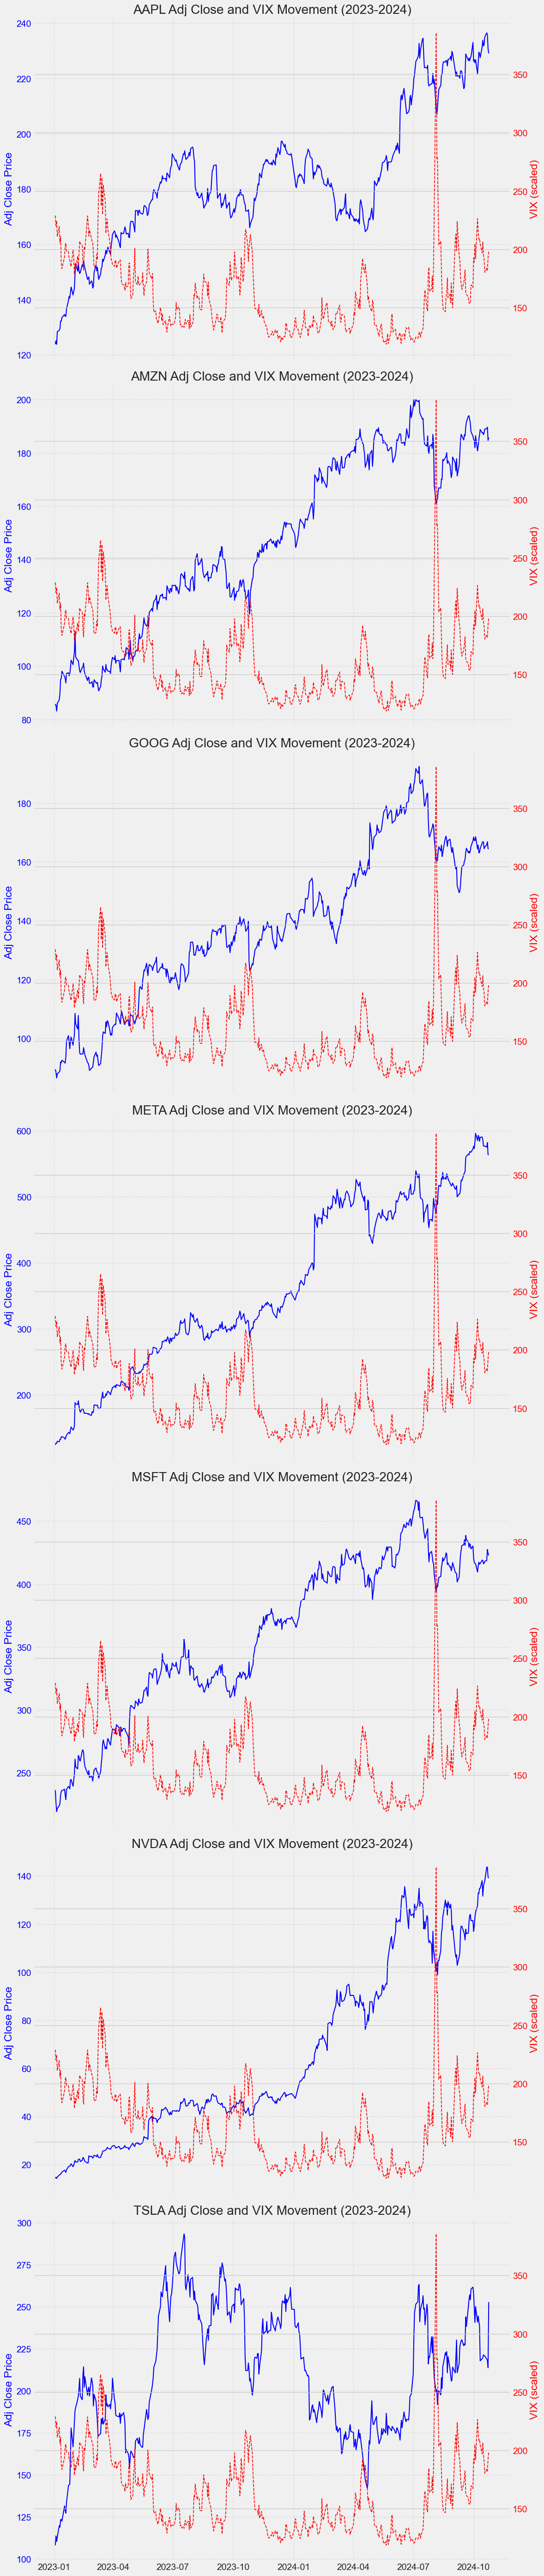

In [292]:
filtered_data = stock_data[(stock_data['Date'] >= '2023-01-01') & (stock_data['Date'] <= '2024-12-31')]

# Set up a figure with multiple subplots for each ticker
num_tickers = filtered_data['company_name'].nunique()
fig, axes = plt.subplots(num_tickers, 1, figsize=(12, 8 * num_tickers), sharex=True)
axes = axes if num_tickers > 1 else [axes]  # Handle single subplot case

# Loop through each ticker and plot it in a separate subplot
for i, ticker in enumerate(filtered_data['company_name'].unique()):
    ticker_data = filtered_data[filtered_data['company_name'] == ticker]
    
    # Plot Adj Close on primary y-axis
    axes[i].plot(ticker_data['Date'], ticker_data['Adj Close'], label=f'{ticker} Adj Close', color='blue', linewidth=1.5)
    axes[i].set_ylabel('Adj Close Price', color='blue')
    axes[i].tick_params(axis='y', labelcolor='blue')
    
    # Plot VIX on secondary y-axis with scaling factor for better visualization
    ax2 = axes[i].twinx()
    ax2.plot(ticker_data['Date'], ticker_data['VIX'] * 10, label='VIX (scaled)', color='red', linestyle='--', linewidth=1.2)
    ax2.set_ylabel('VIX (scaled)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Set title and grid
    axes[i].set_title(f'{ticker} Adj Close and VIX Movement (2023-2024)')
    axes[i].grid(visible=True, linestyle='--', alpha=0.5)
    
    # Format x-axis for better readability
    axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

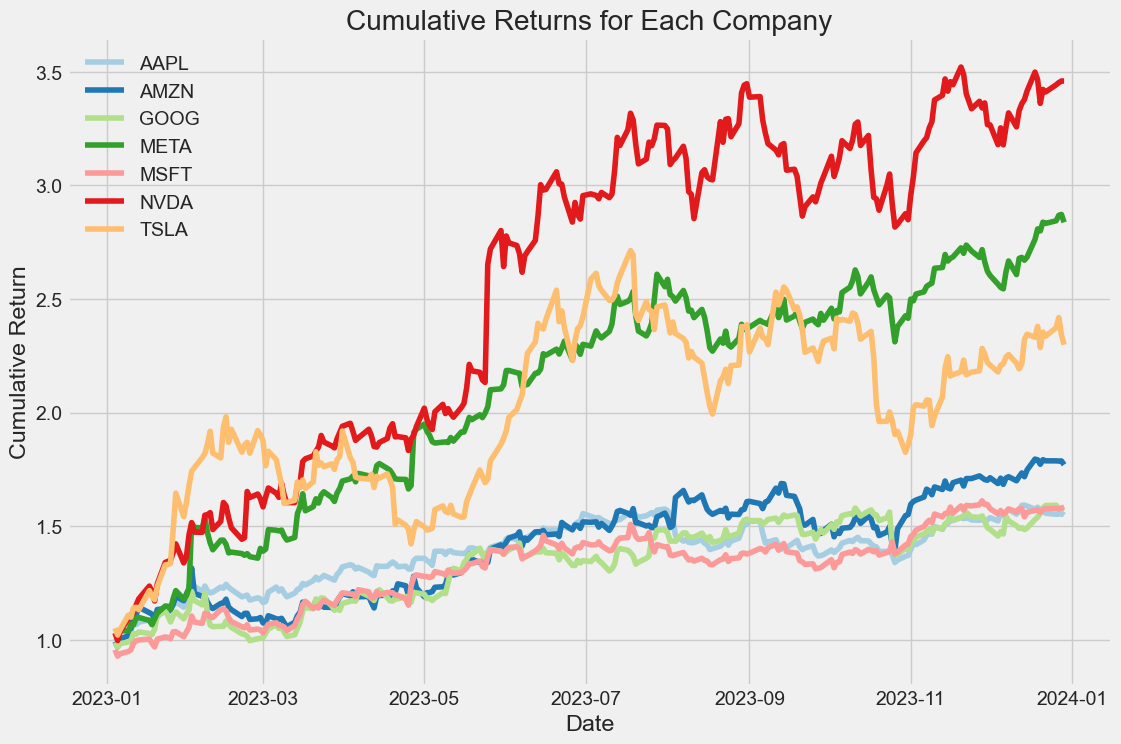

In [293]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

filtered_data = stock_data[stock_data['Date'] >= '2023-01-01']
filtered_data = filtered_data[filtered_data['Date'] <= '2024-01-01']

filtered_data.loc[:, 'Daily Return'] = filtered_data.groupby('company_name')['Adj Close'].pct_change()
filtered_data['Cumulative Return'] = (1 + filtered_data['Daily Return']).groupby(filtered_data['company_name']).cumprod()

colors = sns.color_palette("Paired", len(company_name))

plt.figure(figsize=(12, 8))
for i, company in enumerate(company_name):
    company_data = filtered_data[filtered_data['company_name'] == company]
    plt.plot(company_data['Date'], company_data['Cumulative Return'], label=company, color=colors[i])

plt.title("Cumulative Returns for Each Company")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

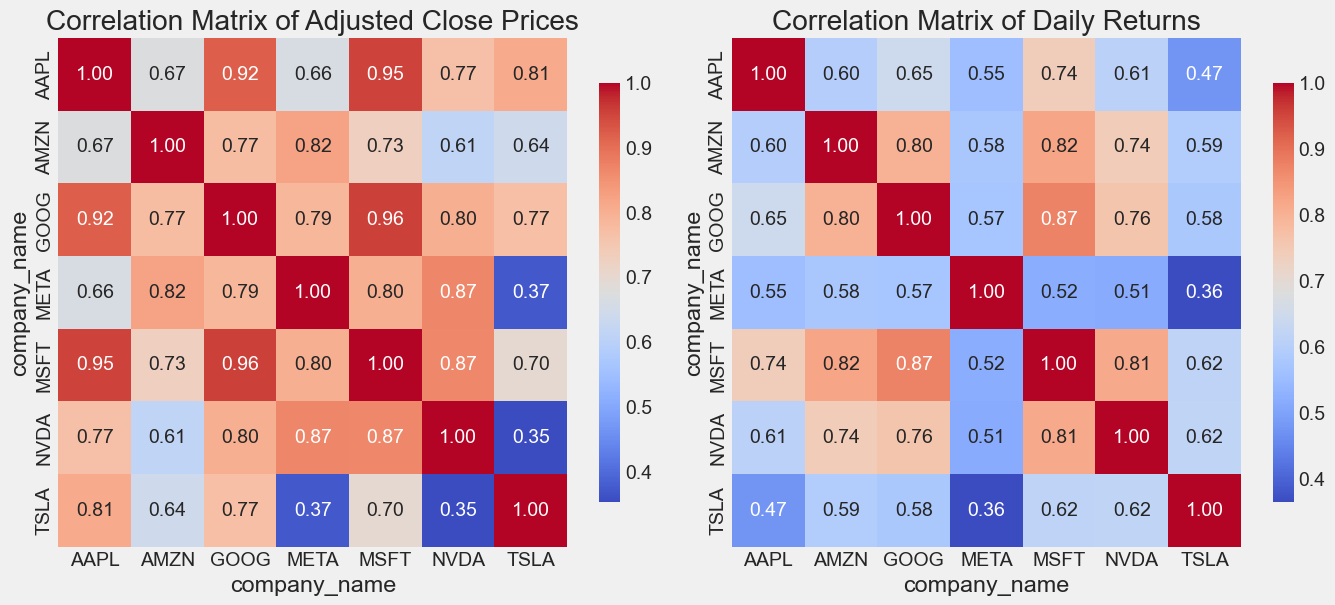

In [294]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()

# Create a pivot table for Adjusted Close prices
adj_close_matrix = stock_data.pivot(index='Date', columns='company_name', values='Adj Close')

# Calculate the correlation matrix for Adj Close
adj_close_corr = adj_close_matrix.corr()

# Create a pivot table for Daily Returns
daily_return_matrix = stock_data.pivot(index='Date', columns='company_name', values='Daily Return')

# Calculate the correlation matrix for Daily Returns
daily_return_corr = daily_return_matrix.corr()

# Plot the correlation matrices
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(adj_close_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Adjusted Close Prices")

plt.subplot(1, 2, 2)
sns.heatmap(daily_return_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Daily Returns")

plt.tight_layout()
plt.show()

In [295]:
apple_data = stock_data[stock_data['company_name'] == 'AAPL']  # Replace 'AAPL' with the correct ticker if necessary
apple_data = apple_data.dropna()

# Convert the 'Date' column to datetime
apple_data["Date"] = pd.to_datetime(apple_data["Date"])


# Set 'Date' as the index
apple_data.set_index("Date", inplace=True)

# Now the index should be a DatetimeIndex, and you can format it if necessary
# If you want to keep it as a DatetimeIndex without time, you can normalize it:
apple_data.index = apple_data.index.normalize()

# Display the updated DataFrame
print(apple_data.head())

                           Adj Close  Close   High    Low   Open     Volume  \
Date                                                                          
2019-01-03 00:00:00+00:00      33.99  35.55  36.43  35.50  35.99  365248800   
2019-01-04 00:00:00+00:00      35.44  37.06  37.14  35.95  36.13  234428400   
2019-01-07 00:00:00+00:00      35.36  36.98  37.21  36.47  37.17  219111200   
2019-01-08 00:00:00+00:00      36.04  37.69  37.96  37.13  37.39  164101200   
2019-01-09 00:00:00+00:00      36.65  38.33  38.63  37.41  37.82  180396400   

                          company_name  20EMA  50SMA    RSI    VIX  \
Date                                                                 
2019-01-03 00:00:00+00:00         AAPL  40.46  45.88  27.23  25.45   
2019-01-04 00:00:00+00:00         AAPL  40.14  45.52  32.08  21.38   
2019-01-07 00:00:00+00:00         AAPL  39.84  45.14  34.91  21.40   
2019-01-08 00:00:00+00:00         AAPL  39.63  44.82  38.91  20.47   
2019-01-09 00:00:00+00:00 

In [296]:
apple_data

Adj Close   Close    High     Low    Open  \
Date                                                                   
2019-01-03 00:00:00+00:00      33.99   35.55   36.43   35.50   35.99   
2019-01-04 00:00:00+00:00      35.44   37.06   37.14   35.95   36.13   
2019-01-07 00:00:00+00:00      35.36   36.98   37.21   36.47   37.17   
2019-01-08 00:00:00+00:00      36.04   37.69   37.96   37.13   37.39   
2019-01-09 00:00:00+00:00      36.65   38.33   38.63   37.41   37.82   
...                              ...     ...     ...     ...     ...   
2024-10-18 00:00:00+00:00     235.00  235.00  236.18  234.01  236.18   
2024-10-21 00:00:00+00:00     236.48  236.48  236.85  234.45  234.45   
2024-10-22 00:00:00+00:00     235.86  235.86  236.22  232.60  233.89   
2024-10-23 00:00:00+00:00     230.76  230.76  235.14  227.76  234.08   
2024-10-24 00:00:00+00:00     229.07  229.07  230.40  228.41  229.92   

                              Volume company_name   20EMA   50SMA    RSI  \
Date                                                                       
2019-01-03 00:00:00+00:00  365248800         AAPL   40.46   45.88  27.23   
2019-01-04 00:00:00+00:00  234428400         AAPL   40.14   45.52  32.08   
2019-01-07 00:00:00+00:00  219111200         AAPL   39.84   45.14  34.91   
2019-01-08 00:00:00+00:00  164101200         AAPL   39.63   44.82  38.91   
2019-01-09 00:00:00+00:00  180396400         AAPL   39.51   44.49  39.35   
...                              ...          ...     ...     ...    ...   
2024-10-18 00:00:00+00:00   46431500         AAPL  228.86  225.53  52.77   
2024-10-21 00:00:00+00:00   36254500         AAPL  229.58  225.93  66.66   
2024-10-22 00:00:00+00:00   38846600         AAPL  230.18  226.30  64.70   
2024-10-23 00:00:00+00:00   52037200         AAPL  230.24  226.49  57.30   
2024-10-24 00:00:00+00:00   12981831         AAPL  230.13  226.64  53.20   

                             VIX  Daily Return  
Date                                            
2019-01-03 00:00:00+00:00  25.45     -0.099603  
2019-01-04 00:00:00+00:00  21.38      0.042660  
2019-01-07 00:00:00+00:00  21.40     -0.002257  
2019-01-08 00:00:00+00:00  20.47      0.019231  
2019-01-09 00:00:00+00:00  19.98      0.016926  
...                          ...           ...  
2024-10-18 00:00:00+00:00  18.03      0.012277  
2024-10-21 00:00:00+00:00  18.37      0.006298  
2024-10-22 00:00:00+00:00  18.20     -0.002622  
2024-10-23 00:00:00+00:00  19.24     -0.021623  
2024-10-24 00:00:00+00:00  19.89     -0.007324  

[1463 rows x 12 columns]

In [297]:
features = ["Adj Close", "Volume", "20EMA", "50SMA", "RSI", "VIX", "Daily Return"]
data_values = apple_data[features].values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_values)

scaled_df = pd.DataFrame(scaled_data, columns=features, index=apple_data.index)

scaled_df.head()

Adj Close    Volume     20EMA     50SMA       RSI  \
Date                                                                           
2019-01-03 00:00:00+00:00   0.000000  0.851857  0.008464  0.030362  0.260011   
2019-01-04 00:00:00+00:00   0.007161  0.535505  0.006792  0.028430  0.312358   
2019-01-07 00:00:00+00:00   0.006766  0.498465  0.005225  0.026392  0.342903   
2019-01-08 00:00:00+00:00   0.010124  0.365439  0.004127  0.024675  0.386077   
2019-01-09 00:00:00+00:00   0.013136  0.404844  0.003501  0.022905  0.390826   

                                VIX  Daily Return  
Date                                               
2019-01-03 00:00:00+00:00  0.195502      0.116958  
2019-01-04 00:00:00+00:00  0.138299      0.689197  
2019-01-07 00:00:00+00:00  0.138580      0.508522  
2019-01-08 00:00:00+00:00  0.125509      0.594957  
2019-01-09 00:00:00+00:00  0.118623      0.585684

In [298]:
# Prepping the data for LSTM Model

sequence_length = 120
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])  # Append previous `sequence_length` days
    y.append(scaled_data[i, 0])  # The next day's Close price

X, y = np.array(X), np.array(y)

X.shape, y.shape

((1343, 120, 7), (1343,))

Epoch 1/10


C:\Users\jemin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1343/1343 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - loss: 0.0155
Epoch 2/10
1343/1343 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - loss: 0.0031
Epoch 3/10
1343/1343 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - loss: 0.0022
Epoch 4/10
1343/1343 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - loss: 0.0025
Epoch 5/10
1343/1343 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - loss: 0.0019
Epoch 6/10
1343/1343 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - loss: 0.0017
Epoch 7/10
1343/1343 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - loss: 0.0016
Epoch 8/10
1343/1343 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - loss: 0.0018
Epoch 9/10
1343/1343 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - loss: 0.0017
Epoch 10/10
1343/1343 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - loss: 0.0014


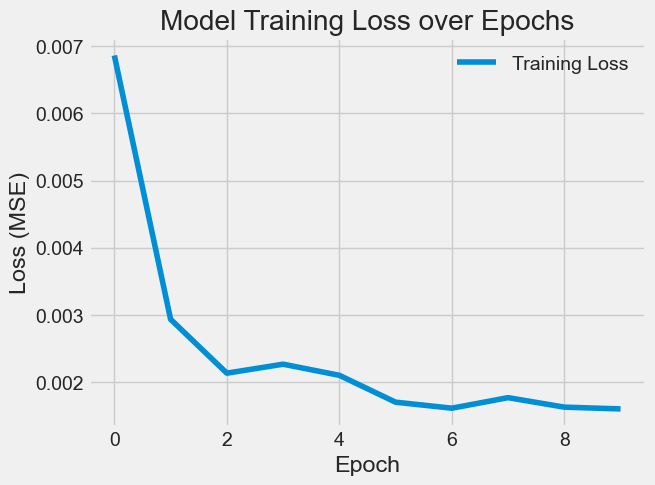

In [299]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),  # Adding dropout for regularization
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)  # Output layer to predict the next day's Close price
])

# Compiling the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Training the model (demonstrative with few epochs)
history = model.fit(X, y, epochs=10, batch_size=1, verbose=1)

# Plotting the training loss
plt.plot(history.history["loss"], label="Training Loss")
plt.title("Model Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

In [300]:
train_size = int(len(scaled_data) * 0.8)  # 80% for training
training_data_len = train_size  # Set the training data length

# Split into training data
train_data = scaled_data[:training_data_len]

# Prepare test data
test_data = scaled_data[training_data_len - sequence_length:, :]

X_test, y_test = [], []
for i in range(sequence_length, len(test_data)):
    X_test.append(test_data[i - sequence_length:i])
    y_test.append(test_data[i, 0])  # Assuming first column is Close price

# Convert lists to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)


predictions = model.predict(X_test)

# Reverse scaling to get actual prices
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step


In [301]:
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 3.674201423088443
Root Mean Squared Error: 4.816803418098059


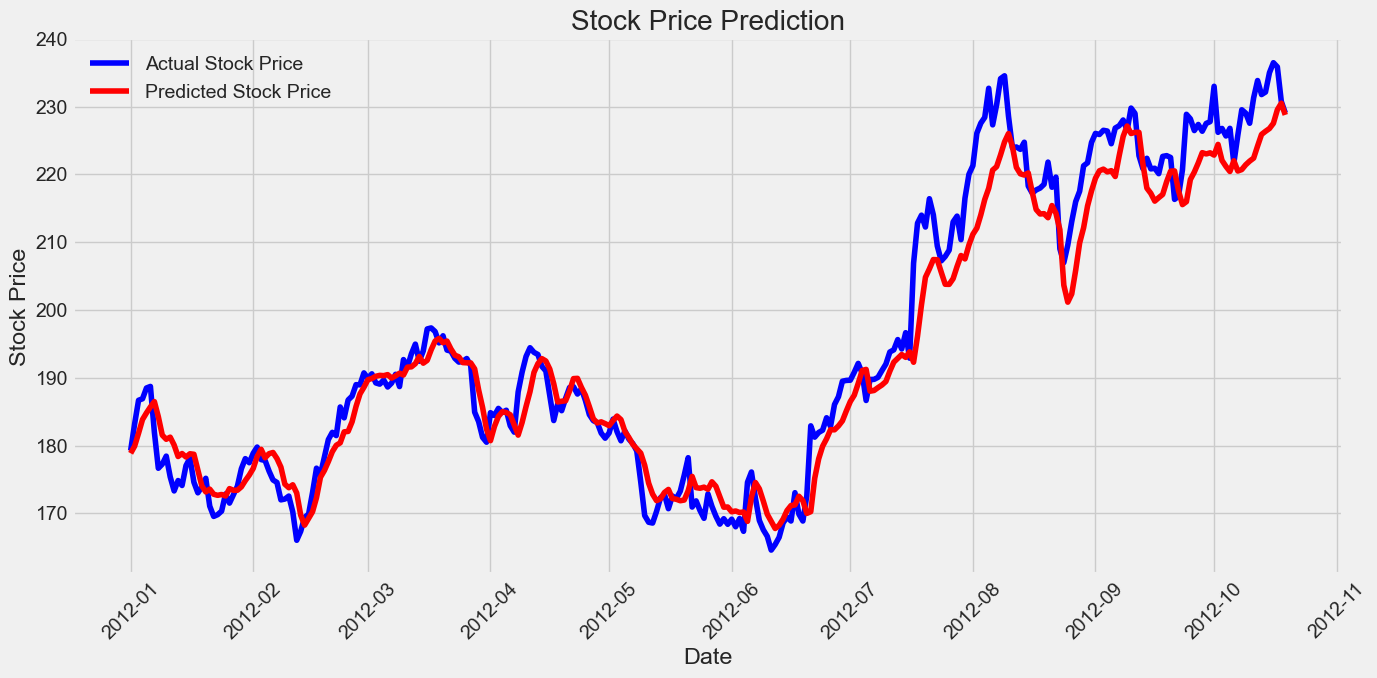

In [302]:
start_date = '2012-01-01'  # Example start date
date_range = pd.date_range(start=start_date, periods=len(y_test_actual), freq='D')  # Adjust frequency as necessary

plt.figure(figsize=(14, 7))
plt.plot(date_range, y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(date_range, predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


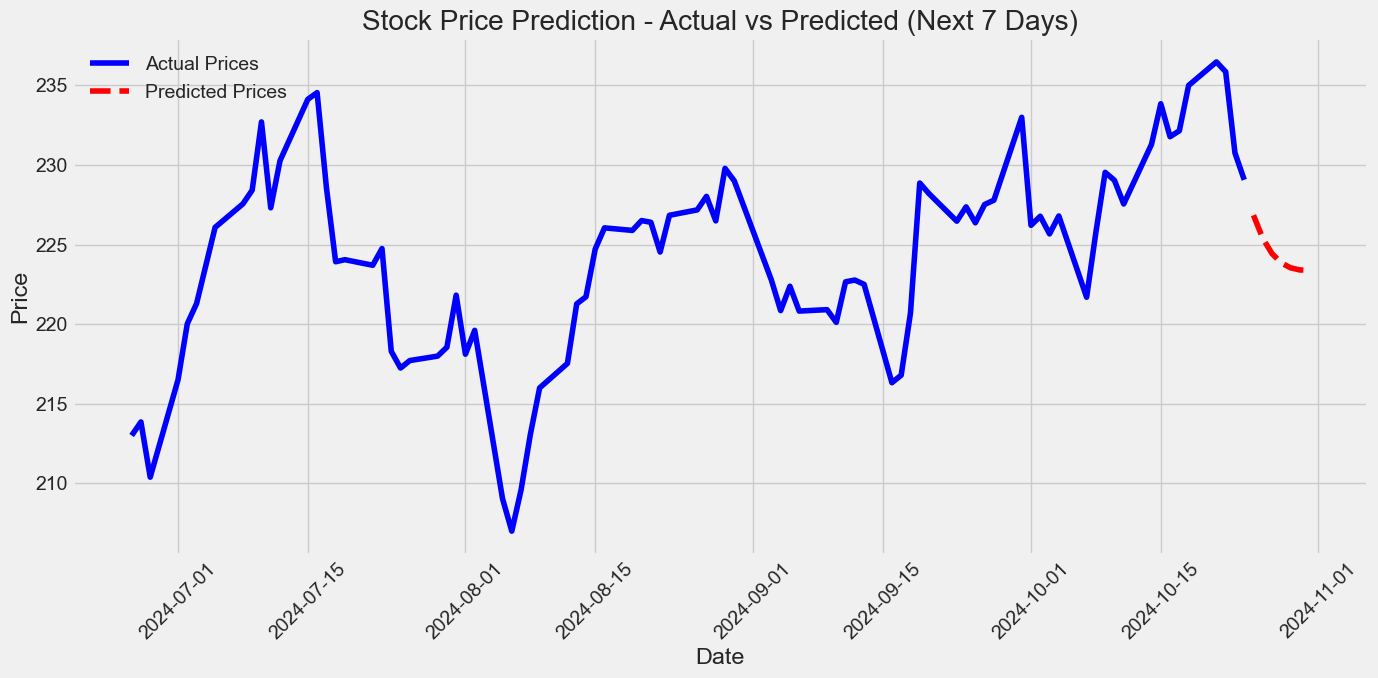

In [303]:
# Use the last 60 days of scaled data for prediction
last_60_days = scaled_data[-sequence_length:]

future_predictions = []

for _ in range(7):
    # Reshape the last 60 days' data for the model
    X_input = last_60_days.reshape((1, sequence_length, last_60_days.shape[1]))
    
    # Make a prediction
    predicted_price = model.predict(X_input)
    
    # Append the predicted price to the future predictions
    future_predictions.append(predicted_price[0, 0])
    
    # Prepare new row for future data
    new_row = last_60_days[-1].copy()
    new_row[0] = predicted_price[0, 0]  # Set the predicted Close price
    
    # Update last_60_days to include the new predicted price
    last_60_days = np.append(last_60_days, [new_row], axis=0)[-sequence_length:]  # Keep only the last 60 days

# Dates for the next 7 days
last_date = apple_data.index[-1]  # Get the last date from the index
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 8)]  # Next 7 days

# Combine future predictions into a DataFrame
predicted_prices_df = pd.DataFrame({'Date': future_dates, 'Predicted Price': future_predictions})

# Create a 2D array for inverse transformation
predicted_prices_array = np.zeros((len(future_predictions), scaled_data.shape[1]))
predicted_prices_array[:, 0] = future_predictions  # Assign predicted prices to the first column

# Inverse scaling to get the predicted prices back to original scale
predicted_prices = scaler.inverse_transform(predicted_prices_array)

# Update predicted prices DataFrame with the original scale prices
predicted_prices_df['Predicted Price'] = predicted_prices[:, 0]  # Only take the first column

# Prepare actual prices for the last 60 days for comparison
actual_prices = apple_data[['Adj Close']].copy()  # Since Date is index, no need for a 'Date' column
actual_prices = actual_prices[actual_prices.index >= last_date - pd.Timedelta(days=sequence_length)]

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(actual_prices.index, actual_prices['Adj Close'], color='blue', label='Actual Prices')
plt.plot(predicted_prices_df['Date'], predicted_prices_df['Predicted Price'], color='red', linestyle='--', label='Predicted Prices')
plt.title('Stock Price Prediction - Actual vs Predicted (Next 7 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ARIMA

In [305]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima


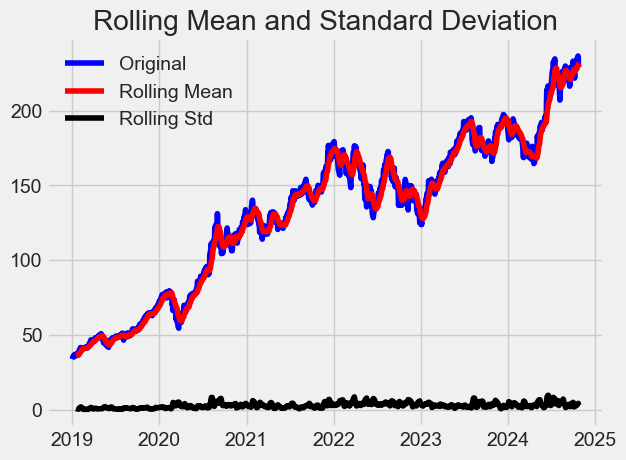

Results of dickey fuller test
Test Statistics                  -0.935814
p-value                           0.775950
No. of lags used                  0.000000
Number of observations used    1462.000000
critical value (1%)              -3.434831
critical value (5%)              -2.863519
critical value (10%)             -2.567824
dtype: float64


In [306]:
data = apple_data["Adj Close"]

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(data)

##### The Dickey-Fuller test output suggests that the time series is likely non-stationary, as the test statistic (-0.9358) is greater than the critical values at common significance levels, and the high p-value (0.776) means we fail to reject the null hypothesis. This implies that the series may exhibit trends or seasonality, indicating it is not stationary and may need differencing or other transformations for further time-series analysis.

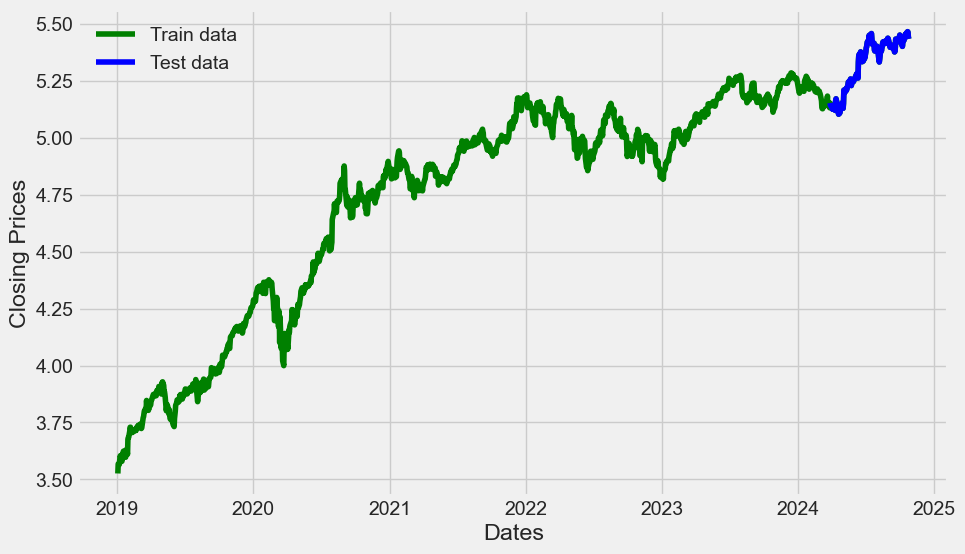

In [308]:
df_log = np.log(data)
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6560.069, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6575.227, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6574.930, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6557.439, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6573.240, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6573.242, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-6571.436, Time=0.05 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 2.089 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1313
Model:               SARIMAX(1, 1, 0)   Log Likelihood                3290.613
Date:                Fri, 01 Nov 2024   AIC                          -6575.227
Time:                        19:26

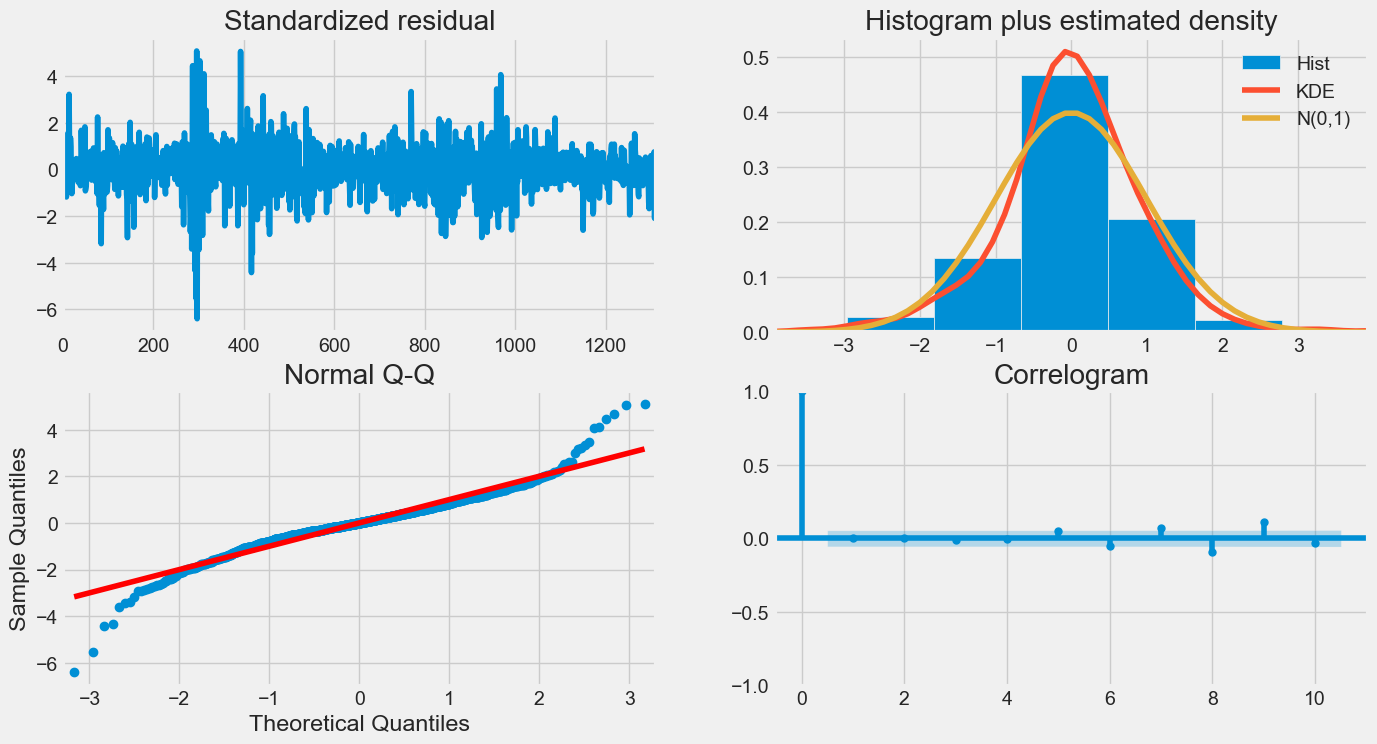

In [309]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [310]:
# Fit the ARIMA model
model = ARIMA(train_data, order=(1, 1, 0))
fitted = model.fit()

# Print model summary
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1313
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3287.718
Date:                Fri, 01 Nov 2024   AIC                          -6571.436
Time:                        19:26:18   BIC                          -6561.077
Sample:                             0   HQIC                         -6567.551
                               - 1313                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1101      0.017     -6.395      0.000      -0.144      -0.076
sigma2         0.0004   9.02e-06     43.239      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.02   Jarque-

C:\Users\jemin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\jemin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\jemin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [311]:
forecast_results = fitted.get_forecast(steps=20)

# Extract the forecasted mean values
fc = forecast_results.predicted_mean

# Extract standard errors and confidence intervals
se = forecast_results.se_mean
conf = forecast_results.conf_int(alpha=0.05)

# Display forecast results
print(fc.head())       # Forecasted values
print(se.head())       # Standard errors
print(conf.head()) 

1313    5.132293
1314    5.132212
1315    5.132221
1316    5.132220
1317    5.132220
Name: predicted_mean, dtype: float64
1313    0.019745
1314    0.026431
1315    0.031872
1316    0.036498
1317    0.040602
Name: var_pred_mean, dtype: float64
      lower Adj Close  upper Adj Close
1313         5.093593         5.170993
1314         5.080407         5.184016
1315         5.069753         5.194689
1316         5.060685         5.203755
1317         5.052642         5.211797


C:\Users\jemin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\jemin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



C:\Users\jemin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\jemin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



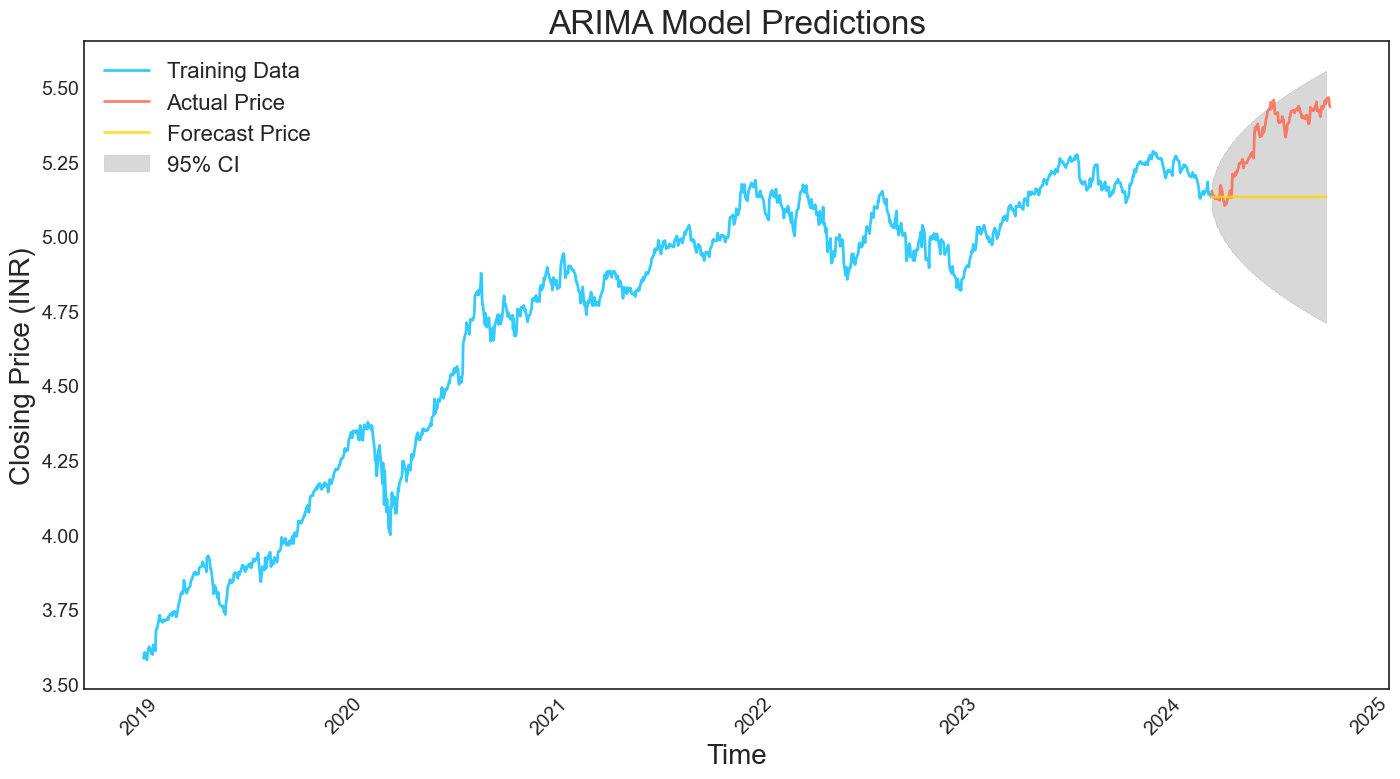

In [312]:
forecast_df = fitted.get_forecast(steps=len(test_data)).summary_frame(alpha=0.05)
forecast_index = pd.date_range(start=test_data.index[0], periods=len(test_data), freq="B")

fc_series = pd.Series(forecast_df['mean'].values, index=forecast_index)  # Forecasted values
lower_series = pd.Series(forecast_df['mean_ci_lower'].values, index=forecast_index)  # Lower bounds
upper_series = pd.Series(forecast_df['mean_ci_upper'].values, index=forecast_index)  # Upper bounds

# In-sample predictions for training data only
predictions = fitted.get_prediction(start=train_data.index[0], end=train_data.index[-1], dynamic=False)

# Plotting
plt.style.use('seaborn-v0_8-white')
plt.figure(figsize=(15, 8))

# Training data and actual test data
plt.plot(train_data, label='Training Data', color='deepskyblue', linewidth=2, alpha=0.8)
plt.plot(test_data, label='Actual Price', color='tomato', linewidth=2, alpha=0.8)

# Forecast and in-sample prediction
plt.plot(fc_series, label='Forecast Price', color='gold', linewidth=2, alpha=0.8)
# Confidence interval shading
plt.fill_between(forecast_index, lower_series, upper_series, color='grey', alpha=0.3, label='95% CI')

# Title and labels
plt.title('ARIMA Model Predictions', fontsize=24)
plt.ylabel('Closing Price (INR)', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=16)

In [313]:
test_data = pd.Series(test_data)
fc_series = pd.Series(fc_series)

# Calculate errors
mse = np.mean((test_data - fc_series) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(test_data - fc_series))

# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.04953931453471304
Root Mean Squared Error (RMSE): 0.22257428992296716
Mean Absolute Error (MAE): 0.19403800150735795


# Random Forest

Root Mean Squared Error: 1.26


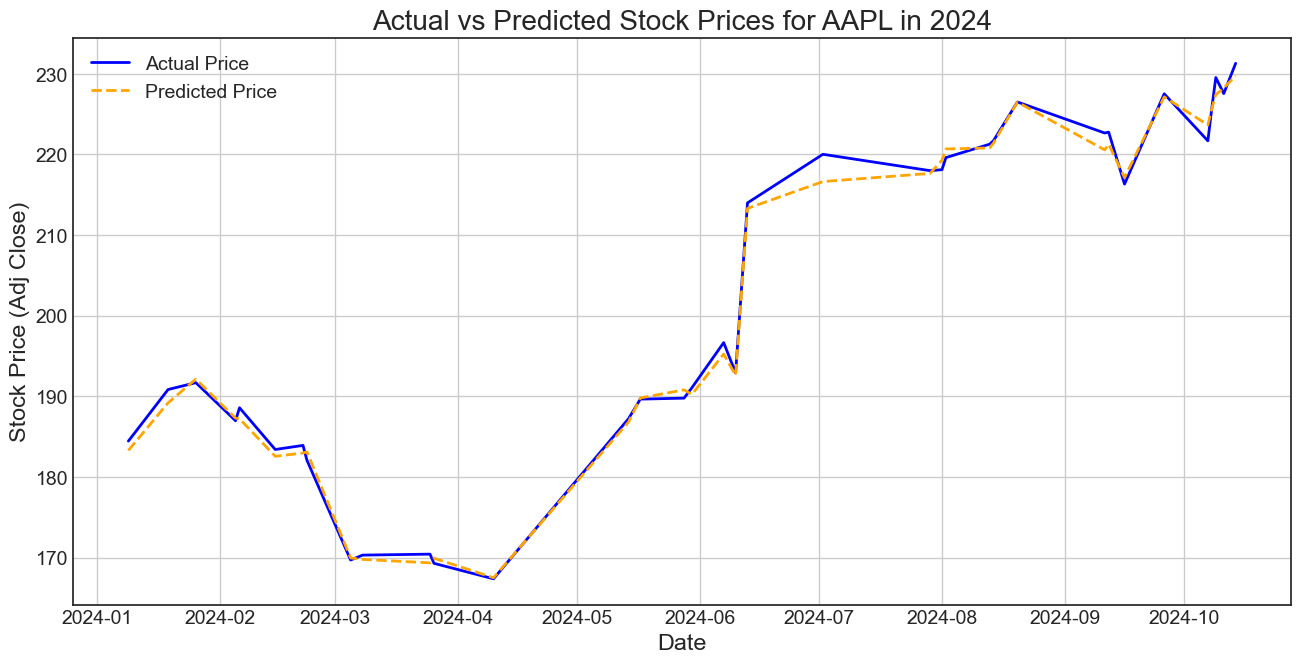

In [315]:
X = apple_data.drop(columns=['Adj Close', 'Close', 'company_name', 'Daily Return'])
y = apple_data['Adj Close']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse:.2f}")

# Create a DataFrame for the actual vs predicted values
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)

# Sort the DataFrame by date for plotting
predictions_df.sort_index(inplace=True)
predictions_2024 = predictions_df[predictions_df.index.year == 2024]

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(predictions_2024['Actual'], label='Actual Price', color='blue', linewidth=2)
plt.plot(predictions_2024['Predicted'], label='Predicted Price', color='orange', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Stock Prices for AAPL in 2024')
plt.xlabel('Date')
plt.ylabel('Stock Price (Adj Close)')
plt.legend()
plt.grid()
plt.show()

C:\Users\jemin\AppData\Local\Temp\ipykernel_12100\1398546569.py:18: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '230.13' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



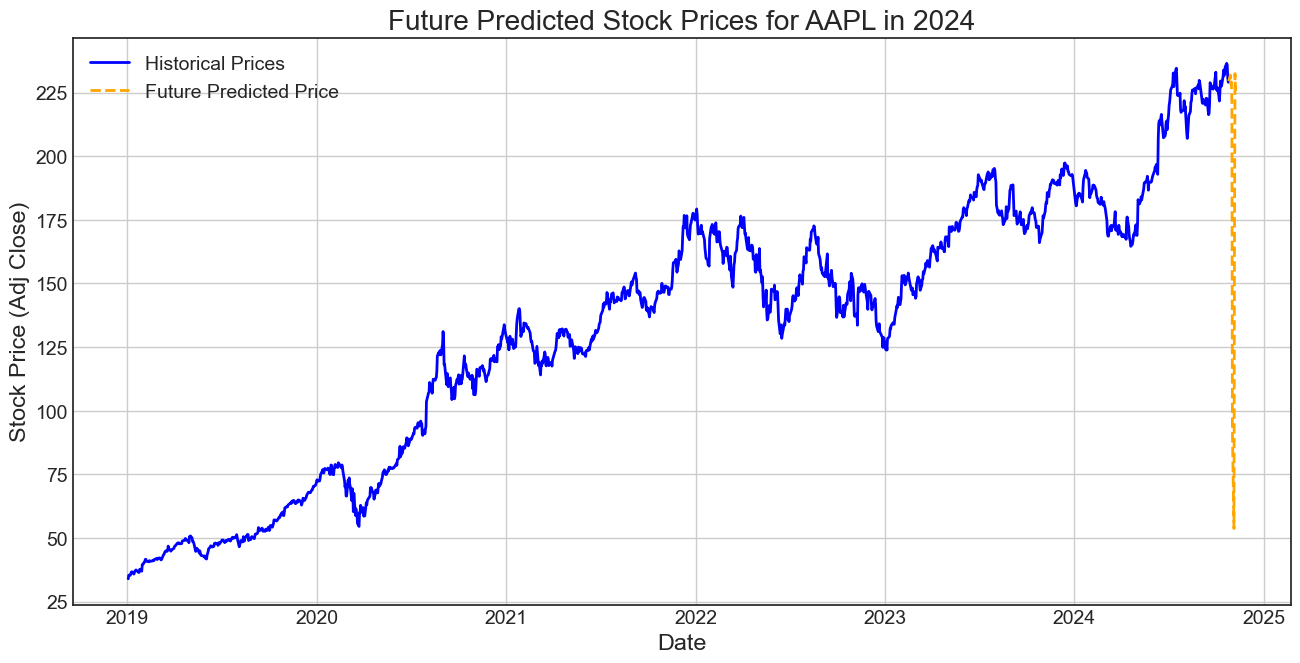

In [316]:
latest_data = apple_data.iloc[-1].drop(['Adj Close', 'Close', 'company_name', 'Daily Return'])

# Create a DataFrame for the latest data
latest_data_df = pd.DataFrame([latest_data], columns=latest_data.index)

# Generate future dates (next 10 business days)
future_dates = pd.date_range(start=apple_data.index[-1] + pd.Timedelta(days=1), periods=10, freq='B')

# Prepare a DataFrame for future predictions
future_predictions = []

for date in future_dates:
    # Predict the next price
    future_pred = rf_model.predict(latest_data_df)
    future_predictions.append(future_pred[0])

    # Update latest_data with the new predicted values
    latest_data_df.iloc[0, :-1] = latest_data_df.iloc[0, 1:]  # Shift features
    latest_data_df.iloc[0, -1] = future_pred[0]  # Add the new prediction

# Create a DataFrame for future predictions
future_predictions_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted Price'])

# Filter future predictions for 2024 only
future_predictions_2024 = future_predictions_df[future_predictions_df.index.year == 2024]

# Plot historical and future predictions for 2024
plt.figure(figsize=(14, 7))
plt.plot(apple_data['Adj Close'], label='Historical Prices', color='blue', linewidth=2)
plt.plot(future_predictions_2024.index, future_predictions_2024['Predicted Price'], label='Future Predicted Price', color='orange', linestyle='--', linewidth=2)
plt.title('Future Predicted Stock Prices for AAPL in 2024')
plt.xlabel('Date')
plt.ylabel('Stock Price (Adj Close)')
plt.legend()
plt.grid()
plt.show()

In [317]:
future_predictions_df

Predicted Price
2024-10-25 00:00:00+00:00         229.5116
2024-10-28 00:00:00+00:00         231.8731
2024-10-29 00:00:00+00:00         228.2857
2024-10-30 00:00:00+00:00         229.2038
2024-10-31 00:00:00+00:00         221.2577
2024-11-01 00:00:00+00:00          91.7256
2024-11-04 00:00:00+00:00          53.7368
2024-11-05 00:00:00+00:00         166.3644
2024-11-06 00:00:00+00:00         232.4437
2024-11-07 00:00:00+00:00         225.6041

In [318]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


  Feature  Importance
1     Low    0.730000
0    High    0.238132
2    Open    0.024505
4   20EMA    0.005860
5   50SMA    0.001339
7     VIX    0.000076
3  Volume    0.000053
6     RSI    0.000037
